<a href="https://colab.research.google.com/github/gabrielbchacon/Hotel-booking-demand/blob/main/Hotel_booking_demand_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libs


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Data cleanning and first exploring

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### As we can see, there is some null values. Let's fix it. 

In [4]:
df.isnull().sum()[df.isnull().sum() > 0]*100/len(df)

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

In [5]:
#fist of all, let's create a copy of the dataset to work

hotel_data = df

Missing values: 

- For those columns that the amount of missing values are bellow of 1%, let's just drop them. 

- Consireding "company" there a lot of missing values, I think it will better 
to drop this column. 

- Agent [ID of the travel agency that made the booking] at this case, considering that this data is significantly filled, one thing that is possible to do is to fill all of them by the mode. 

In [6]:
# for childern and country

hotel_data.dropna(subset = ['children', 'country'], inplace = True)

In [7]:
# for company

hotel_data.drop('company', axis = 1, inplace = True)

In [8]:
# for agent
hotel_data['agent'].value_counts()

9.0      31959
240.0    13871
1.0       7191
14.0      3638
7.0       3539
         ...  
197.0        1
450.0        1
352.0        1
367.0        1
346.0        1
Name: agent, Length: 332, dtype: int64

In [9]:
df['agent'].fillna(float(9.0), inplace=True)

#I could just run the following cade like (data['agent'].fillna(float(data['agent'].mode()), inplace=True)) but I prefer to check if there is other values as frequent as the mode first.

In [10]:
#If I dind't anything wrong, it should be zero
hotel_data.isnull().sum().sum()

0

In [11]:
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df['arrival_date_month_num'] = df['arrival_date_month'].map(d)

#Data Viz and Exploring

I'm not a big fan of getting some dataset and starting to analyze it without any background or business question to consider. 

I don't think in the real-life people just throw data into your face and say "analyze it!" hahaha. 

Just let's create some situations of here:  

- I'm was hired to manage a hotel and but, as I came from a totally different area, I not so close to the hotel's market.
- I asked for my Data Team to present some KPI's to let me know the biggest struggles of this area

In [25]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [13]:
#first lets separate the orders completed and orders that was cancelled.
order_not_canceled = hotel_data[hotel_data['is_canceled'] == 0]
order_canceled = hotel_data[hotel_data['is_canceled'] == 1]

Which is the most ordered place to reverse? Most of the reservations is focused on City Hotels


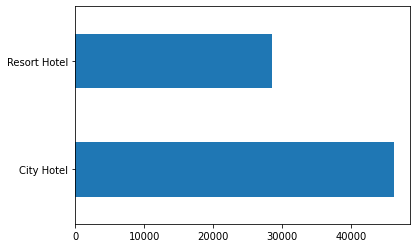

In [14]:
order_not_canceled['hotel'].value_counts().plot(kind='barh')

Which is the most demand by week of the year? We can see the demand trend to start to growth around week 25 and reach the max at week 32. Which is between the middle of Jun and Agoust. The commum period of vacations. 


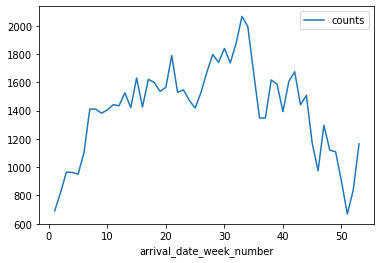

In [44]:
table2 = order_not_canceled.groupby(by=['arrival_date_week_number']).size().reset_index(name='counts')
table2.plot.line(x='arrival_date_week_number', y='counts')
#sns.lineplot(data=table2.sort_values('arrival_date_year'), x="arrival_date_year", y="counts")

Text(0.5, 1.0, 'Adults/Children by Month, Year')

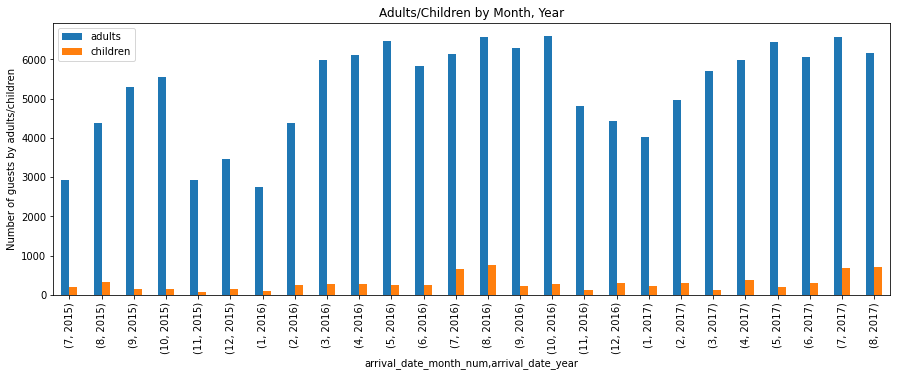

In [24]:
table3 = order_not_canceled.groupby(['arrival_date_month_num', 'arrival_date_year'])[['adults', 'children']].sum()
table3.sort_values(['arrival_date_year','arrival_date_month_num']).plot.bar(figsize = (15, 5))

plt.ylabel('Number of guests by adults/children')
plt.title('Adults/Children by Month, Year')

This chart show us that the trend of hotels be crowded at Jun and Agoust is been seeing at 2016 and 2017. Also, We can see that the number of childers increased a lot at this mounths. Which may impact the amount of resourses that we should allocate for children zones like playgrounds and monitors to keep they entreteniment. 

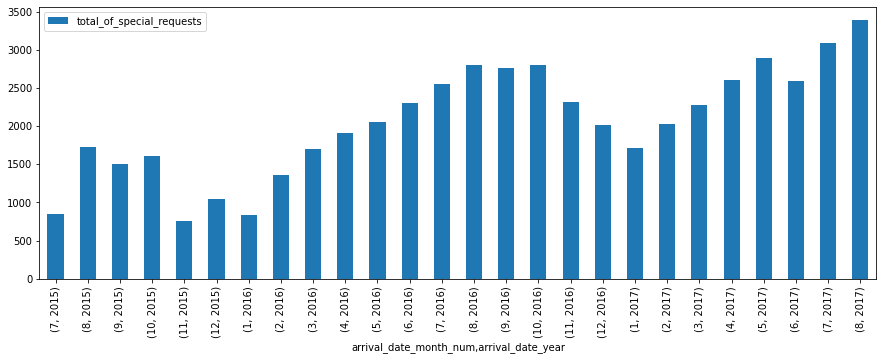

In [50]:
table4 = order_not_canceled.groupby(['arrival_date_month_num', 'arrival_date_year'])[['total_of_special_requests']].sum()
table4.sort_values(['arrival_date_year','arrival_date_month_num']).plot.bar(figsize = (15, 5))


This chart shows something it is logic which is that the amount of special requets trend to increase as the amount of guests increase. I decided to check it anyway because I thought that some sazonal periods may impacts the amount of especial requets. Maybe the best way to check it is to put the amount of reservations and special requets togheter at the same chart separeted by week. It will help us to compare both curves. 

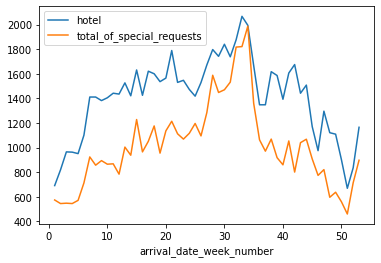

In [54]:
table5 = pd.pivot_table(order_not_canceled, values=['total_of_special_requests', 'hotel'], index=['arrival_date_week_number'], aggfunc={'total_of_special_requests': np.sum, 'hotel': 'count'})
table5.reset_index()
table5.plot.line(y=['hotel','total_of_special_requests'])

In [ ]:
As we can see, both curves looks following the same trend during the weeks of the year. What refuted my thoughts that some seasonal periods my impact the amount of special requests.